## Importing required packages

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install collections


from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
#import gdown
import seaborn as sns

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute

## Downloading the data

In [2]:
# Download from Google Drive
#url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
#output = '/home/user/data/german.data' # Destination directory
#gdown.download(url, output, quiet=False) 

In [3]:
#Load the data using pandas read_csv method
#df=read_csv(output, sep=" ", header=None)
#Display the first few rows in the dataframe
#df.head()

In [4]:
#Download directly from website
df=read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
               sep=" ",header=None)
#Display first few rows in the data frame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Data Visualization

In [5]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)

In [6]:
# Task1
# Display the first few rows of the data
df_vis.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


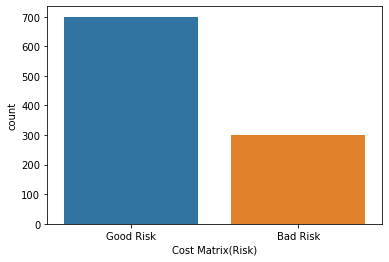

In [7]:
#Task2: Plot the frequency of each label/target variable as a histogram/barplot

sns.countplot(x="Cost Matrix(Risk)", data=df_vis)

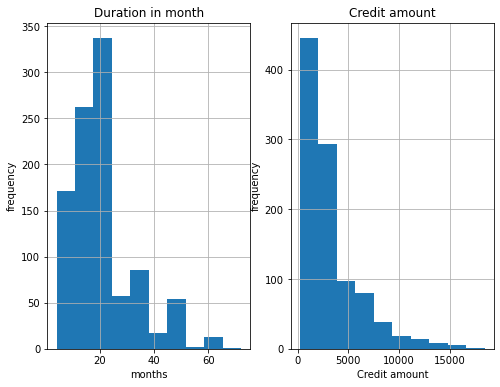

In [8]:
#Task2: Plot the histogram of values from any other attribute of choice
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
df_vis['Duration in month'].hist()
plt.title('Duration in month')
plt.xlabel("months")
plt.ylabel("frequency")

plt.subplot(1,2,2)
df_vis['Credit amount'].hist()
plt.title('Credit amount')

plt.xlabel("Credit amount")
plt.ylabel("frequency")

plt.show()

## Prepare Data

In [9]:
# split the data frame into inputs and outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]

In [10]:
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


In [11]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Train the Model

Hyper Parameters for Logistic Regression
1. penalty: Used to specify the norm used in the penalization. 
2. C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
3. max_iter: Maximum number of iterations taken for the solvers to converge.

Epoch: One Epoch is when an entire dataset is passed forward and backward through the classifier / neural network only once.

Iterations: Iterations is the number of batches that is passed forward and backward through the classifier.

In [12]:
# Declaring and training a classifier
# Logistic regression classifier
clf = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Hyper Parameters for Decision Trees
1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
 - Gini: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
 - Entropy is a measure of information that indicates the disorder of the features with the target.
2. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
3. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
4. min_samples_split: The minimum number of samples required to split an internal node

In [13]:
# Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Hyper Parameters for SVM
1. kernel: (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed') Specifies the kernel type to be used in the algorithm.
2. degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
3. gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
4. max_iter: Hard limit on iterations within solver, or -1 for no limit.

In [14]:
# SVM classifier
clf = SVC(kernel='poly', degree=3, max_iter=300000)
clf.fit(X_train, y_train)

SVC(kernel='poly', max_iter=300000)

Hyper Parameters for LinearRegression:
1. fit_intercept: Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered)
2. normalize: If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [15]:
# Linear classifier
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

Gaussian Naive Bayes:
The likelihood of the features is assumed to be Gaussian. Paramters are
1. priors: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
2. var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [16]:
# Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [17]:
# Task 3
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.



Minimum error:- 0.325 at K = 4


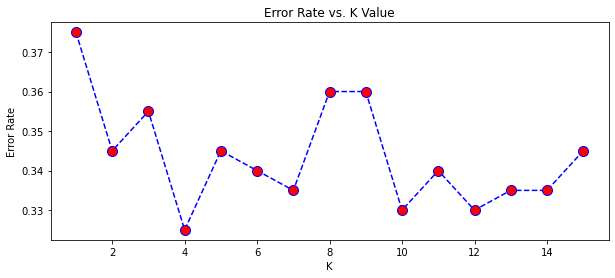

In [18]:
error_rate = []
# Might take some time
for i in range(1,16):    
    knn = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    #print(pred_i)
    error_rate.append(np.mean(y_pred_knn != y_test))


##############################################
# Plot elbow plot (Error rate Vs K values)
##############################################
plt.figure(figsize=(10,4))
plt.plot(range(1,16),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

Minimum error:- 0.315 at K = 13


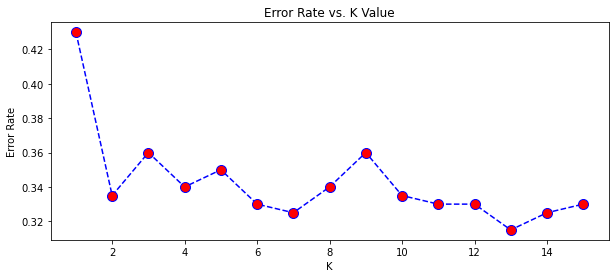

In [19]:
error_rate = []
# Might take some time
for i in range(1,16):    
    knn = KNeighborsClassifier(n_neighbors=i, metric = "manhattan")
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    #print(pred_i)
    error_rate.append(np.mean(y_pred_knn != y_test))


##############################################
# Plot elbow plot (Error rate Vs K values)
##############################################
plt.figure(figsize=(10,4))
plt.plot(range(1,16),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

### Inference:
  For Euclidean distance: number of neighbours that gives best performance is 4
  
  For Manhatten distance : number of neighbours that gives best performance is 13

In [20]:
# Task 4
# Implement two other classifiers of your choice with sklearn

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [37]:
rf =  RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test) # predict

#model evaluation
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.69
Recall: 0.69
Precision: 0.69
F1-score: 0.5244669427826354
[[128   2]
 [ 60  10]]


In [38]:
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test) # predict

#model evaluation
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.745
Recall: 0.745
Precision: 0.745
F1-score: 0.7032727272727273
[[112  18]
 [ 33  37]]


## Evaluate the Model

In [24]:
#Predicting for test data
y_pred = clf.predict(X_test)

In [25]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [26]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.73
Recall: 0.73
Precision: 0.73
F1-score: 0.7149192271143492


## Visualization of Results

In [27]:
## Task 5: Insert the code for visualizing the comfusion matrix here
#store the confusion matrix in the variable cm with dim:2x2
cm = confusion_matrix(y_test, y_pred)
cm

array([[96, 34],
       [20, 50]], dtype=int64)

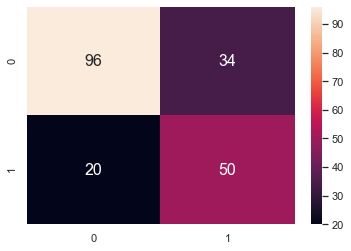

In [28]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, fmt="d",annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [29]:
#Sample code to print confusion matrix using ConfusionMatrixDisplay
'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
'''

'\nfrom sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay\ncm = confusion_matrix(y_test, y_pred, labels=clf.classes_)\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)\ndisp.plot()\nplt.show()\n'

In [30]:
#Sample code to print confusion matrix using poper labels
'''
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d",cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
'''

'\ncm = confusion_matrix(y_test, y_pred)\nax = sns.heatmap(cm, annot=True, fmt="d",cmap=\'Blues\')\n\nax.set_title(\'Seaborn Confusion Matrix with labels\n\n\');\nax.set_xlabel(\'\nPredicted Values\')\nax.set_ylabel(\'Actual Values \');\n\n## Ticket labels - List must be in alphabetical order\nax.xaxis.set_ticklabels([\'False\',\'True\'])\nax.yaxis.set_ticklabels([\'False\',\'True\'])\n\n## Display the visualization of the Confusion Matrix.\nplt.show()\n'

In [31]:
# Task 5: Calculate ROC curve and find fpr, tpr, thresholds
fpr, tpr, ths = roc_curve(y_test, y_pred)

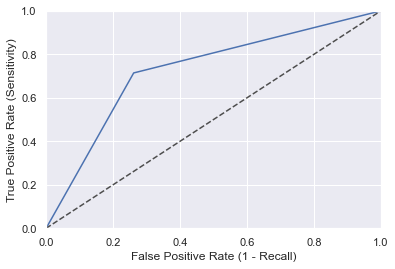



Area Under Curve: 0.73




In [32]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

## K-Fold Validation

In [33]:
# Implement K-fold validation and compare the perfromance with 80-20 random split (using sklearn methods)
DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# prediction with decision tree classifier 
y_pred = DT.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       130
           1       0.52      0.51      0.52        70

    accuracy                           0.67       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.66      0.67      0.66       200



In [36]:
kf = KFold(shuffle = True, n_splits =5)
accuracy_score_kf_dt = cross_val_score(DT,X,y,cv=kf, n_jobs =-1)
print(accuracy_score_kf_dt)

[0.725 0.66  0.66  0.665 0.67 ]
